In [1]:
import numpy as np
a = 0.5
b = 3
n = 100000
N = int(np.ceil(1 + 3.322*np.log10(n)))

In [2]:
def logic_grow(n : int, a : int, b : int):
    yield a
    for _ in range(1, n):
        a = b*a*(1-a)
        yield a

In [4]:
space = np.linspace(1, n, n)
logic = np.fromiter(logic_grow(n, a, b), float)

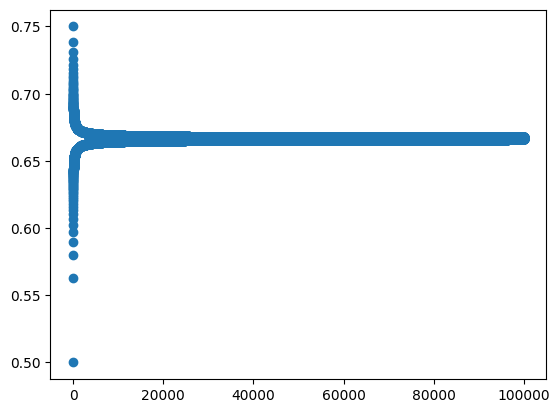

In [16]:
import matplotlib.pyplot as plt
ax = plt.subplot(1,1,1)
ax.scatter(space, logic)

In [17]:
avg = np.average(logic)
avg_sq = np.average(logic**2)

In [18]:
avg / (avg - avg_sq)

2.999992533490263

In [19]:
def calc_b():
    x_a = np.cumsum(logic) / space
    x_a_sq = np.cumsum(logic**2) /space
    E_ps = np.random.uniform(-0.25, 0.25, n)
    D = 1/48
    y = logic + E_ps
    y_a = np.cumsum(y) / space
    y_a_sq = np.cumsum(y**2) / space
    
    B_n = x_a / (x_a - x_a_sq)
    B_yn = y_a / (y_a - (y_a_sq - D))
    return B_n, B_yn

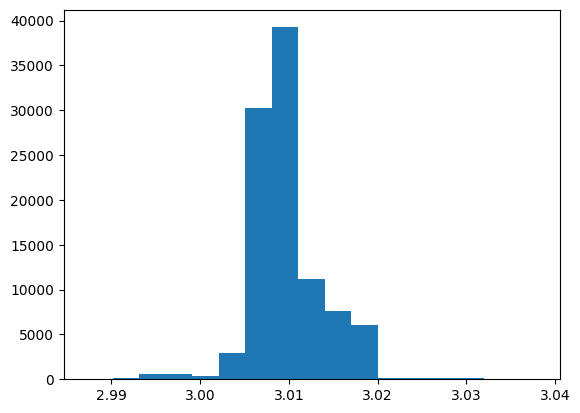

In [39]:
#bins = [2.89963,2.94201,2.98438,3.02676,3.06914,3.11151]

B_n, B_yn = calc_b()
bins = np.linspace(min(B_yn[max(n//100, 100):]),max(B_yn[max(n//100, 100):]),N)

ax = plt.hist(B_yn, bins = bins)
#plt.hist(B_n, bins = bins)